# ***`SMART GATE KEEPING`***

Download the dataset from: https://drive.google.com/drive/folders/18GTVuZWJ9wdahMQcY_pD1TN7AZvjTxsJ?usp=drive_link

* Upload this dataset in your google drive
* Create a csv in your google drive
* Copy the path of csv file and paste it at 'csv_filename' variable
* Columns for the csv file are : Date, Name, Registration Number, In-Time, Vehicle type, Out-Time.
* Or download the sample sheet from: https://drive.google.com/file/d/1_Dw2nOc0Bil5L9f1vnatf6C_04T_bKhC/view?usp=sharing

# ***`Just run these cells only once after opening the notebook...`***


In [ ]:
#@title IMPORTING LIBRARIES
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
import os
import shutil
import random
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense, BatchNormalization, Conv2D, MaxPooling2D, Flatten, LeakyReLU, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy
from tensorflow.keras import models, regularizers
from sklearn.metrics import confusion_matrix
import seaborn as sns
from google.colab import files
!pip install imutils
!pip install easyocr
!pip install openpyxl
import easyocr
import cv2
import imutils
import math
from IPython.display import HTML
from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode
from IPython.display import Image
import io
from PIL import Image
from datetime import datetime
import pytz
import openpyxl
from google.colab import drive
from google.colab import files
import time
import csv
drive.mount('/content/drive')

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 8.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 908.3/908.3 kB 17.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 307.2/307.2 kB 13.8 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manyli

Found 7647 images belonging to 9 classes.
Found 963 images belonging to 9 classes.
Found 953 images belonging to 9 classes.
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 64, 64, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 32, 32, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 16, 16, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 16, 16, 128)       73856    

/usr/local/lib/python3.10/dist-packages/PIL/Image.py:996: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


765/765 - 236s - loss: 2.6199 - accuracy: 0.3331 - val_loss: 1.8096 - val_accuracy: 0.4372 - 236s/epoch - 309ms/step
Epoch 2/5
765/765 - 203s - loss: 1.7420 - accuracy: 0.4565 - val_loss: 1.5826 - val_accuracy: 0.5182 - 203s/epoch - 265ms/step
Epoch 3/5
765/765 - 200s - loss: 1.5592 - accuracy: 0.5171 - val_loss: 1.6342 - val_accuracy: 0.5130 - 200s/epoch - 261ms/step
Epoch 4/5
765/765 - 190s - loss: 1.3815 - accuracy: 0.5707 - val_loss: 1.5022 - val_accuracy: 0.5379 - 190s/epoch - 248ms/step
Epoch 5/5
765/765 - 183s - loss: 1.2913 - accuracy: 0.6095 - val_loss: 1.4690 - val_accuracy: 0.5670 - 183s/epoch - 239ms/step
96/96 [==============================] - 17s 171ms/step


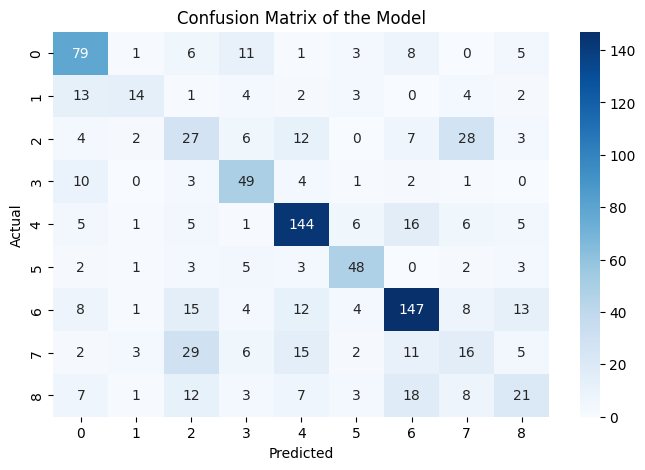

In [ ]:
# @title CLASSIFICATION MODEL
random.seed(42)

# Creating destination directories for train, test, and validation data
destination_dirs = [f"{dataset}/{cls}" for dataset in ["train", "test", "validation"] for cls in classes]
for dir in destination_dirs:
    if not os.path.exists(dir):
        os.makedirs(dir)

# Function for splitting files into train, test, and validation sets
def split_files(source_dir, train_dir, test_dir, validation_dir):
    files = os.listdir(source_dir)
    random.shuffle(files)
    train_count = int(0.8 * len(files))
    test_count = int(0.1 * len(files))
    train_files = files[:train_count]
    test_files = files[train_count:train_count + test_count]
    validation_files = files[train_count + test_count:]

    # Copying files to respective directories
    for file in train_files:
        shutil.copy(os.path.join(source_dir, file), train_dir)
    for file in test_files:
        shutil.copy(os.path.join(source_dir, file), test_dir)
    for file in validation_files:
        shutil.copy(os.path.join(source_dir, file), validation_dir)

# Splitting files for each class
split_files(source_dir_auto_rickshaw, "train/Auto-rickshaw", "test/Auto-rickshaw", "validation/Auto-rickshaw")
split_files(source_dir_tractor, "train/Tractor", "test/Tractor", "validation/Tractor")
split_files(source_dir_mini_truck, "train/Mini-truck", "test/Mini-truck", "validation/Mini-truck")
split_files(source_dir_bicycle, "train/Bicycle", "test/Bicycle", "validation/Bicycle")
split_files(source_dir_car, "train/Car", "test/Car", "validation/Car")
split_files(source_dir_bike, "train/Bike", "test/Bike", "validation/Bike")
split_files(source_dir_ambulance, "train/Ambulance", "test/Ambulance", "validation/Ambulance")
split_files(source_dir_truck, "train/Truck", "test/Truck", "validation/Truck")
split_files(source_dir_bus, "train/Bus", "test/Bus", "validation/Bus")


# Data augmentation and preprocessing using keras
train_datagen = ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input)
validation_datagen = ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input)
test_datagen = ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input)

# Loading train, validation, and test data
train_batches = train_datagen.flow_from_directory(
    directory="train",
    target_size=(64, 64),
    classes=classes,
    batch_size=batch_size)
validation_batches = validation_datagen.flow_from_directory(
    directory="validation",
    target_size=(64, 64),
    classes=classes,
    batch_size=batch_size)
test_batches = test_datagen.flow_from_directory(
    directory="test",
    target_size=(64, 64),
    classes=classes,
    batch_size=batch_size,
    shuffle=False)

# Model architecture
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(64, 64, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu', kernel_regularizer=regularizers.l2(0.001)))
model.add(Dense(len(classes), activation='softmax'))  # Update the output layer for the number of classes
model.summary()

# Compiling the model
model.compile(optimizer=Adam(learning_rate=0.001), loss="categorical_crossentropy", metrics=["accuracy"])

# Training the model with 5 epochs
history = model.fit(x=train_batches, validation_data=validation_batches, epochs=5, verbose=2)

# Class predictions for the test data
predictions = model.predict(x=test_batches)
rounded_predictions = np.round(predictions)

# Calculating the confusion matrix
cm = confusion_matrix(y_true=test_batches.classes, y_pred=np.argmax(predictions, axis=-1))

# Plotting the obtained confusion matrix
plt.figure(figsize=(8, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title("Confusion Matrix of the Model")
plt.savefig('Confusion_Matrix_Model.png')
plt.show()

In [ ]:
# @title VEHICLE CLASSIFIER
# Function for taking image and returning the type of vehicle using classifier
def predict_image(captured_image):
    img = image.load_img(captured_image, target_size=(64, 64))
    img_array = image.img_to_array(img)
    img_batch = np.expand_dims(img_array, axis=0)
    img_preprocessed = tf.keras.applications.vgg16.preprocess_input(img_batch)

    predictions = model.predict(img_preprocessed)
    predicted_class = np.argmax(predictions[0])

    classes = ["Auto-rickshaw", "Tractor", "Mini-truck", "Bicycle", "Car", "Bike", "Ambulance", "Truck", "Bus"]
    return classes[predicted_class]

In [ ]:
# @title NUMBER PLATE READER

# Function to extract the license plate number from the given image
def readtext(image_path):
    # Reading the image path from the arguments of the function
    image = cv2.imread(image_path)
    if image is None:
        print("Error: Image not found.")
        return None

    # Resizing the image to desired width
    image = imutils.resize(image, width=500)
    img = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    plt.imshow(img)
    plt.axis('off')
    plt.show()

    # Converting the image to grayscale
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    plt.imshow(gray)
    plt.axis('off')
    plt.show()

    # Appling bilateral filter to reduce noise
    gray = cv2.bilateralFilter(gray, 11, 17, 17)
    plt.imshow(gray)
    plt.axis('off')
    plt.show()

    # Detecting edges using the Canny edge detection attribute
    edged = cv2.Canny(gray, 170, 200)
    plt.imshow(edged)
    plt.axis('off')
    plt.show()

    # Finding contours in the edged image for shape analysis
    cnts, _ = cv2.findContours(edged.copy(), cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)
    cnts = sorted(cnts, key=cv2.contourArea, reverse=True)[:30]
    NumberPlateCnt = None

    # Iterating through the contours and finding for polygon of 4 sides
    #(i.e, squares and rectangles because the license plates are generally are of square and rectangled shape)
    for c in cnts:
        peri = cv2.arcLength(c, True)
        approx = cv2.approxPolyDP(c, 0.02 * peri, True)
        if len(approx) == 4:
            NumberPlateCnt = approx
            x, y, w, h = cv2.boundingRect(c)
            ROI = img[y:y+h, x:x+w]
            break

    # If the detected number plate contour exists then draw the contour on the image
    if NumberPlateCnt is not None:
        cv2.drawContours(image, [NumberPlateCnt], -1, (0, 255, 0), 3)

    # Function to calculate the distance between two points
    def dist(x1, x2, y1, y2):
        return ((x1 - x2) ** 2 + (y1 - y2) ** 2) ** 0.5

    # Find the topmost point of the number plate contour
    idx = 0
    m = 0
    for i in range(4):
        if NumberPlateCnt[i][0][1] > m:
            idx = i
            m = NumberPlateCnt[i][0][1]

    # Finding the indices of the adjacent points to the topmost point
    pin = (idx - 1) % 4
    nin = (idx + 1) % 4

    # Calculating the distances between the topmost point and its adjacent points
    p = dist(NumberPlateCnt[idx][0][0], NumberPlateCnt[pin][0][0], NumberPlateCnt[idx][0][1], NumberPlateCnt[pin][0][1])
    n = dist(NumberPlateCnt[idx][0][0], NumberPlateCnt[nin][0][0], NumberPlateCnt[idx][0][1], NumberPlateCnt[nin][0][1])

    # Left and right points based on the shorter distance
    if p > n:
        left = pin if NumberPlateCnt[pin][0][0] < NumberPlateCnt[idx][0][0] else idx
        right = idx if left == pin else pin
    else:
        left = nin if NumberPlateCnt[nin][0][0] < NumberPlateCnt[idx][0][0] else idx
        right = idx if left == nin else nin

    # Calculating the opposite side and the hypotenuse of the triangle formed by the topmost point and its adjacent points
    opp = NumberPlateCnt[right][0][1] - NumberPlateCnt[left][0][1]
    hyp = dist(NumberPlateCnt[left][0][0], NumberPlateCnt[right][0][0], NumberPlateCnt[left][0][1], NumberPlateCnt[right][0][1])
    # Calculating the angle of rotation using trigonometric functions
    sin = opp / hyp
    theta = math.asin(sin) * (180 / math.pi)

    # Rotate the region of interest (ROI) containing the number plate
    image_center = tuple(np.array(ROI.shape[1::-1]) / 2)
    rot_mat = cv2.getRotationMatrix2D(image_center, theta, 1.0)
    result = cv2.warpAffine(ROI, rot_mat, ROI.shape[1::-1], flags=cv2.INTER_LINEAR)

    # Altering the height of the rotated image
    h = result.shape[0] - abs(opp) // 2 if opp > 0 else result.shape[0] + abs(opp) // 2
    result = result[0:h, :]

    # Performing OCR on the rotated image to extract text
    reader = easyocr.Reader(['en'])
    results = reader.readtext(result)
    if results:
        return results[0][1]  # Return the extracted text if successful
    else:
        print("No number plate contour found.")
        return None  # Otherwise, print a message and return None



In [ ]:
#@title CAPTURING PHOTO
def take_photo(filename='photo.jpg', quality=0.8):
    js = Javascript('''
        async function takePhoto(quality) {
            const div = document.createElement('div');
            const capture = document.createElement('button');
            capture.textContent = 'Capture';
            div.appendChild(capture);

            const video = document.createElement('video');
            const stream = await navigator.mediaDevices.getUserMedia({video: true});

            document.body.appendChild(div);
            div.appendChild(video);
            video.srcObject = stream;
            await video.play();

            // Capture the image
            capture.onclick = () => {
                const canvas = document.createElement('canvas');
                canvas.width = video.videoWidth;
                canvas.height = video.videoHeight;
                canvas.getContext('2d').drawImage(video, 0, 0, canvas.width, canvas.height);
                stream.getVideoTracks()[0].stop();
                div.remove();
                const imgData = canvas.toDataURL('image/jpeg', quality);
                google.colab.kernel.invokeFunction('notebook.run_code', [imgData], {});
            };
        }
        takePhoto({{quality}});
    ''')
    display(js)
    data = eval_js('notebook.run_code.result')
    binary = b64decode(data.split(',')[1])
    image = Image.open(io.BytesIO(binary))
    image.save(filename)
    return filename  # Return the path of the saved image

In [ ]:
#@title DRIVER CODE
def person_in():
    choice = input("a. Capture using camera b. Upload image: ")
    if choice == 'a':
        captured_image = take_photo()
        # Assuming take_photo() returns the path to the saved image
    elif choice == 'b':
      uploaded_file = files.upload()
      # Assuming you want to save the uploaded file locally
      # Specify the directory where you want to save the file
      save_directory = '/content/'
      # Save the uploaded file with a unique name (e.g., timestamp)
      saved_filename = f"uploaded_{int(time.time())}.jpg"
      saved_path = os.path.join(save_directory, saved_filename)
      with open(saved_path, 'wb') as f:
          f.write(next(iter(uploaded_file.values())))
      captured_image = saved_path
    else:
        print("Invalid choice for image capturing")

    name = input("Enter the name: ")
    current_time = datetime.now(pytz.timezone("Asia/Kolkata"))
    formatted_time = current_time.strftime("%H:%M:%S")
    formatted_date = current_time.strftime("%Y-%m-%d")

    # Assuming you have functions like predict_image and readtext
    vehicle_type = predict_image(captured_image)
    registration_number = readtext(captured_image)

    if registration_number is None:
        print("Sorry, failed to extract the registration number.")
        print("Please enter it manually:")
        registration_number = input("Enter registration number of the vehicle: ")

    data = {
        "Date": formatted_date,
        "Name": name,
        "Registration Number": registration_number,
        "In-Time": formatted_time,
        "Vehicle Type": vehicle_type,
        "Out-Time": ""  # Leave this empty for now
    }

    print(data)
    csv_filename = "/content/drive/MyDrive/Gate_Keeping_Data.csv"
    with open(csv_filename, "a", newline="") as csvfile:
        fieldnames = data.keys()
        writer = csv.DictWriter(csvfile, fieldnames=fieldnames)

        # If the file is empty, write the header
        if os.path.getsize(csv_filename) == 0:
            writer.writeheader()

        writer.writerow(data)
        csvfile.flush()
    print(f"Record added to {csv_filename} successfully!")
    os.remove(captured_image)
def person_out():
    choice = input("a. Capture using camera b. Upload image: ")
    if choice == 'a':
        captured_image = take_photo()
        # Assuming take_photo() returns the path to the saved image
    elif choice == 'b':
      uploaded_file = files.upload()
      save_directory = '/content/'
      # Save the uploaded file with a unique name (e.g., timestamp)
      saved_filename = f"uploaded_{int(time.time())}.jpg"
      saved_path = os.path.join(save_directory, saved_filename)
      with open(saved_path, 'wb') as f:
          f.write(next(iter(uploaded_file.values())))
      captured_image = saved_path
    else:
        print("Invalid choice for image capturing")
    registration_number = readtext(captured_image)
    if registration_number is None:
        print("Sorry, failed to extract the registration number.")
        print("Please enter it manually:")
        registration_number = input("Enter registration number of the vehicle: ")


    csv_filename = "/content/drive/MyDrive/Gate_Keeping_Data.csv"
    existing_records = []
    with open(csv_filename, "r") as csvfile:
        reader = csv.DictReader(csvfile)
        for row in reader:
            existing_records.append(row)

    # Check if the registration number exists in the records
    found_record = None
    for record in existing_records:
        if record["Registration Number"] == registration_number and not record["Out-time"]:
            found_record = record
            break

    if found_record:
        current_time = datetime.now(pytz.timezone("Asia/Kolkata"))
        formatted_time = current_time.strftime("%H:%M:%S")
        found_record["Out-Time"] = formatted_time
        print("Record found and out-time updated:")
        print(found_record)
    else:
        print("Alert: Non-registered vehicle!")
    os.remove(captured_image)

# ***!!!Run only either one for every entry and exit!!!***




a. Capture using camera b. Upload image: b


Saving 1_wJIu5bx_wMM6ll7IMvx4YA.jpg to 1_wJIu5bx_wMM6ll7IMvx4YA.jpg
Enter the name: Ramesh
1/1 [==============================] - 0s 25ms/step


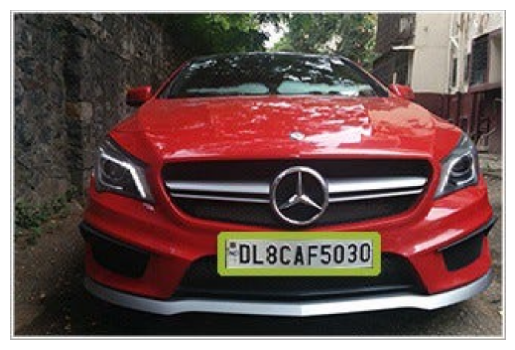

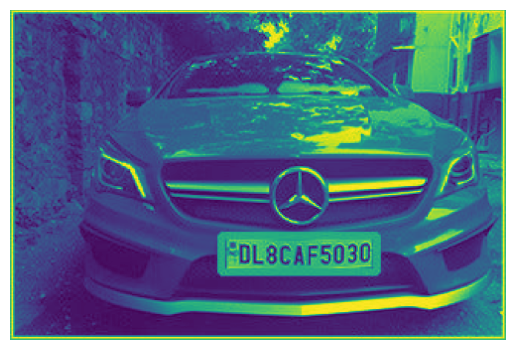

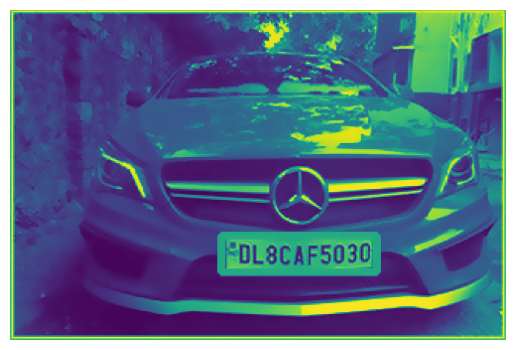

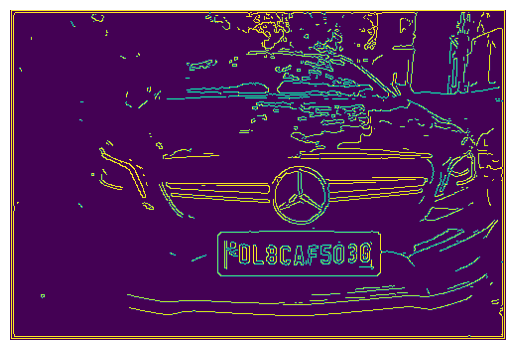

{'Date': '2024-05-20', 'Name': 'Ramesh', 'Registration Number': 'FOLBCAF5030', 'In-Time': '16:52:36', 'Vehicle Type': 'Bike', 'Out-Time': ''}
Record added to /content/drive/MyDrive/Gate_Keeping_Data.csv successfully!


In [ ]:
# @title Run it only for visitor's entry
person_in()

a. Capture using camera b. Upload image: b


Saving vehicle.jpg to vehicle (5).jpg


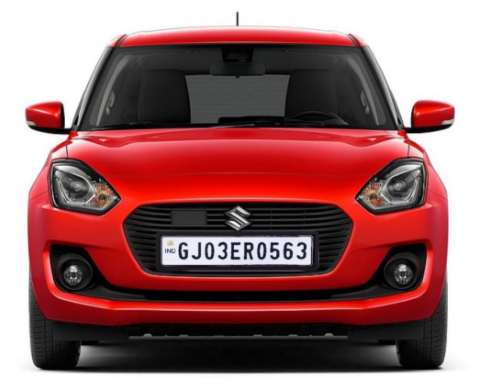

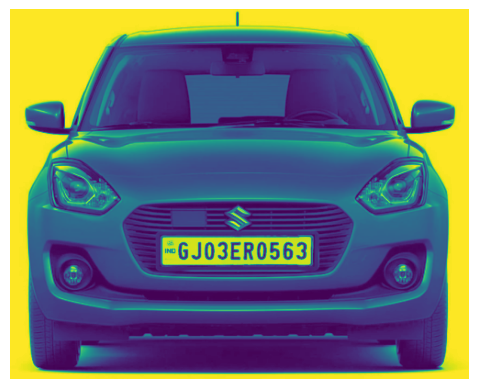

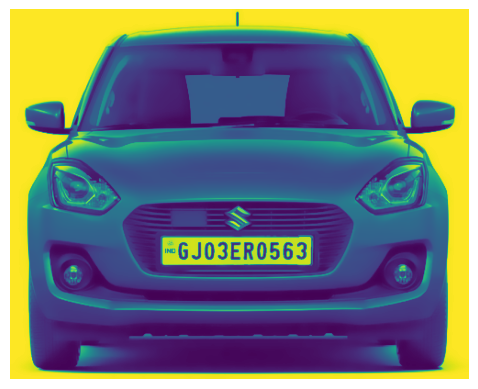

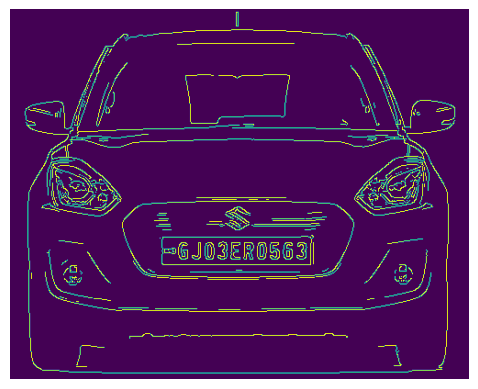

Record found and out-time updated:
{'Date': '2024-05-20', 'Name': 'Kumar', 'Registration Number': '6J03ER0563]', 'In-time': '16:37:04', 'Vehicle type': 'Car', 'Out-time': '', 'Out-Time': '16:50:00'}


In [ ]:
# @title Run it only for visitor's exit
person_out()